# Outline of the attack 

1. Generate a key pair for matrix NTRU

2. Generate a message M1 and encrypted message E1. 

3. Use the public key H to construct the lattice L.

4. Apply BKZ to L and obtain Lreduced

5. Construct a matrix from Lreduced so that it is invertible mod p and mod q using the first n lines of returned bkz

6. Use Hattack to decrypt C1 and check if C1 == M1.

7. Repeat this a couple of times and record sucess rate. 

In [1]:
import numpy as np

load("matrix_ntru_system.sage")

def reduceL(H,n,p,q):
    AB = np.concatenate((identity_matrix(n), p.inverse_mod(q) * H), axis=1)
    CD = np.concatenate((0*identity_matrix(n), q*identity_matrix(n)), axis=1)
    L = matrix(ZZ,np.concatenate((AB,CD),axis=0))
    LBKZ = L.BKZ()
    return LBKZ[0:n,0:n]

In [2]:
# encrypt and decrypt test. test for a fixed value of n = 4 and q = 32
# that is the case of the example from Nayak. 

# Set parameters
def attack(n,q, verbose = False):

    try:
        # n,q = 4,32
        # STEP 1
        setParameters([n,q]) # parameters n and q.
        #getParameters()
        X,Y,Xp,Xq,H = keygen()
        del X,Y,Xp,Xq # to ensure we are not using it to decrypt
        
        # STEP 2
        M = randomMessage()
        E = encrypt(M,H)
        
        # STEP 3 and 4
        Xattack = reduceL(H,n,p,q)
        Xpattack = Matrix(Rp,Xattack).inverse()
        
        # STEP 5
        X,Y,Xp,Xq,H = keygen()
        #C = decrypt(E,X,Xp)
        C = decrypt(E,Xattack,Xpattack)
        #
        # STEP 6
        zeroMatrix = 0*random_matrix(ZZ, nrows = n, ncols = n, x=0, y=0)
        Result = centerLift(C, p)-M == zeroMatrix
        
        
        # Print if Verbose
        if verbose:
            print("M \n{} \n C \n{}".format(M,C))
        return Result
    except:
        return -1

In [3]:
attack(50,4096,False)

True

In [18]:
nvalues = [5,10,20,30,40,50,60,70,80,90,100,110]
q = 256
rep = 100
result = matrix(ZZ,len(nvalues),rep)

for i in range(len(nvalues)):
    print('running for n = ' + str(nvalues[i]))
    setParameters([nvalues[i],q]) # parameters n and q.
    for j in range(rep):
        result[i,j] = attack(nvalues[i],q)
#result

import pickle
fname = "matrix_ntru_atack_q_{}_rep_{}.pkl".format(q,rep)
with open(fname,"wb") as f:
    pickle.dump(result,f)

running for n = 5
running for n = 10
running for n = 20
running for n = 30
running for n = 40
running for n = 50
running for n = 60
running for n = 70
running for n = 80
running for n = 90
running for n = 100


terminate called after throwing an instance of 'std::runtime_error'
  what():  infinite loop in babai
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively


running for n = 110


terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate called recursively
terminate call

In [19]:
import pickle
with open("matrix_ntru_atack_q_{}_rep_{}.pkl".format(4096,100),"rb") as f:
     res = pickle.load(f)

In [20]:
"matrix_ntru_atack_q_{}_rep_{}.pkl".format(4096,100)

'matrix_ntru_atack_q_4096_rep_100.pkl'

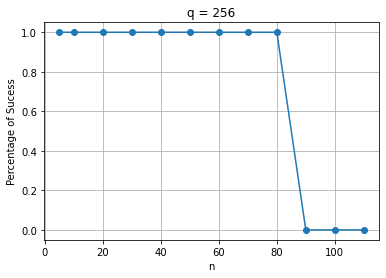

In [21]:
import matplotlib.pyplot as plt
from sage.matrix.constructor import Matrix

# Calculate the percentage of 1's in each row
percentages = [sum([i == 1 for i in row]) / rep * 1.0 for row in result]

# Plot the percentage values against the corresponding values of n
plt.plot(nvalues, percentages, marker='o')
plt.xlabel('n')
plt.ylabel('Percentage of Sucess')
plt.title('q = ' + str(q))
plt.grid(True)
plt.show()